In [177]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import gc

%matplotlib inline

In [178]:
import statsmodels

In [179]:
df = pd.read_csv('FAO.csv', encoding = 'mbcs' ) 

In [180]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [181]:
df1 = df.loc[:, ~(df.columns).isin(['Area Abbreviation','Area Code', 'Item Code', 'Element Code', 'Unit'])]

In [182]:
Aggr_sum = df1.groupby(['Area', 'Item', 'Element']).agg(sum).reset_index()
print(Aggr_sum)

              Area                             Item Element  latitude  \
0      Afghanistan              Alcoholic Beverages    Food     33.94   
1      Afghanistan                      Animal fats    Food     33.94   
2      Afghanistan              Apples and products    Food     33.94   
3      Afghanistan                          Bananas    Food     33.94   
4      Afghanistan              Barley and products    Feed     33.94   
5      Afghanistan              Barley and products    Food     33.94   
6      Afghanistan                             Beer    Food     33.94   
7      Afghanistan             Beverages, Alcoholic    Food     33.94   
8      Afghanistan                      Bovine Meat    Food     33.94   
9      Afghanistan                     Butter, Ghee    Food     33.94   
10     Afghanistan         Cereals - Excluding Beer    Feed     33.94   
11     Afghanistan         Cereals - Excluding Beer    Food     33.94   
12     Afghanistan                   Cereals, Other

In [183]:
Aggr_sum=Aggr_sum.fillna(0)

In [184]:
Aggr_sum_no_att = Aggr_sum.loc[:, ~(Aggr_sum.columns).isin(['latitude', 'longitude'])]

In [185]:
no_att_by_country = Aggr_sum_no_att.groupby(['Area', 'Element']).agg(sum).reset_index()
print(no_att_by_country)

                                   Area Element     Y1961     Y1962     Y1963  \
0                           Afghanistan    Feed     720.0     720.0     736.0   
1                           Afghanistan    Food    8761.0    8694.0    8458.0   
2                               Albania    Feed      94.0     108.0     124.0   
3                               Albania    Food    1612.0    1641.0    1643.0   
4                               Algeria    Feed      83.0      94.0      63.0   
5                               Algeria    Food    7405.0    7141.0    6798.0   
6                                Angola    Feed     118.0     118.0     116.0   
7                                Angola    Food    4716.0    4657.0    5124.0   
8                   Antigua and Barbuda    Feed       2.0       2.0       2.0   
9                   Antigua and Barbuda    Food      90.0      92.0     103.0   
10                            Argentina    Feed    9552.0    7553.0    6527.0   
11                          

In [186]:
by_country = no_att_by_country.groupby(['Area']).agg(sum).reset_index()

In [187]:
df_all = Aggr_sum_no_att

In [188]:
data = by_country

In [189]:
data['total'] = (data['Y1961'] + data['Y1962'] + data['Y1963'] + data['Y1964'] + data['Y1965'] + data['Y1966'] + 
    data['Y1967'] + data['Y1968'] + data['Y1969'] + data['Y1970'] + data['Y1971'] + data['Y1972'] + data['Y1973'] +
    data['Y1974'] + data['Y1975'] + data['Y1976'] + data['Y1977'] + data['Y1978'] + data['Y1979'] + data['Y1980'] + 
    data['Y1981'] + data['Y1982'] + data['Y1983'] + data['Y1984'] + data['Y1985'] + data['Y1986'] + data['Y1987'] + 
    data['Y1988'] + data['Y1989'] + data['Y1990'] + data['Y1991'] + data['Y1992'] + data['Y1993'] + data['Y1994'] + 
    data['Y1995'] + data['Y1996'] + data['Y1997'] + data['Y1998'] + data['Y1999'] + data['Y2000'] + 
    data['Y2001'] + data['Y2002'] + data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )

In [190]:
data.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007,689162.0
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271,237202.0
2,Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,...,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161,1530613.0
3,Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,...,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639,706016.0
4,Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,...,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119,4446.0


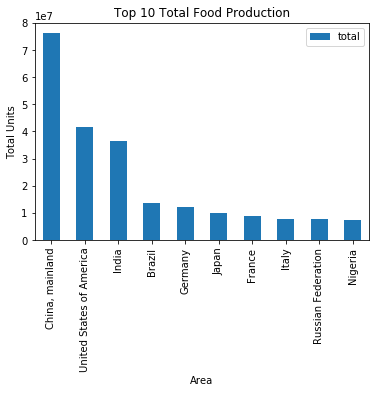

In [191]:
sorted_ = data.sort_values('total', ascending=False).head(10)
sorted_.plot('Area','total', kind = 'bar', title = 'Top 10 Total Food Production')
plt.ylabel('Total Units')
plt.show()

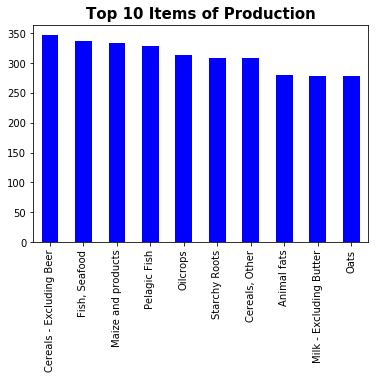

In [192]:
graph_by_items = df_all['Item'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
ax.set_title('Top 10 Items of Production', fontsize = 15, fontweight = 'bold')
graph_by_items[:10].plot(ax=ax, kind='bar', color='blue')

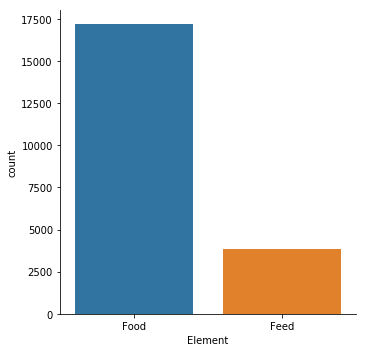

In [193]:
sns.catplot('Element', data = df_all, kind = 'count');

In [194]:
from statsmodels.tsa.arima_model import ARIMA

In [195]:
data.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007,689162.0
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271,237202.0
2,Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,...,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161,1530613.0
3,Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,...,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639,706016.0
4,Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,...,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119,4446.0


In [196]:
data_Bulgaria = data[data['Area'] == 'Bulgaria']
print(data_Bulgaria)

        Area    Y1961    Y1962    Y1963    Y1964    Y1965    Y1966    Y1967  \
23  Bulgaria  15979.0  15990.0  17748.0  18812.0  18178.0  20501.0  19766.0   

      Y1968    Y1969  ...    Y2005    Y2006    Y2007    Y2008    Y2009  \
23  20146.0  20984.0  ...  15388.0  14713.0  13637.0  13079.0  13281.0   

      Y2010    Y2011  Y2012  Y2013      total  
23  13463.0  13007.0  11841  12335  1101372.0  

[1 rows x 55 columns]


In [197]:
data_Bulgaria = data_Bulgaria.loc[:, ~(data_Bulgaria.columns).isin(['total'])]

In [198]:
data_Bulgaria = data_Bulgaria.melt(id_vars=["Area"],
        var_name="Year", 
        value_name="Volume")

In [224]:
data_Bulgaria['Year'] = data_Bulgaria['Year'].str[1:5]
data_Bulgaria['Year']   = pd.to_datetime(data_Bulgaria['Year'])

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [225]:
data_Bulgaria

,Area,Year,Volume
0,Bulgaria,1961-01-01,15979.0
1,Bulgaria,1962-01-01,15990.0
2,Bulgaria,1963-01-01,17748.0
3,Bulgaria,1964-01-01,18812.0
4,Bulgaria,1965-01-01,18178.0
5,Bulgaria,1966-01-01,20501.0
6,Bulgaria,1967-01-01,19766.0
7,Bulgaria,1968-01-01,20146.0
8,Bulgaria,1969-01-01,20984.0
9,Bulgaria,1970-01-01,21607.0


In [201]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [202]:
model = ARIMA(data_Bulgaria.Volume, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.Volume   No. Observations:                   52
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -450.736
Method:                           css   S.D. of innovations           1406.793
Date:                Sat, 29 Jun 2019   AIC                            905.473
Time:                        13:31:54   BIC                            909.375
Sample:                             1   HQIC                           906.969
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.0769    195.087     -0.359      0.721    -452.440     312.287
Residuals Description
count    5.200000e+01
mean    -5.247085e-14
std      1.420518e+03
min     -5.351923e+03
25%     -5.741731e+02

In [210]:
model = ARIMA(data_Bulgaria.Volume, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D2.Volume   No. Observations:                   51
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -462.130
Method:                           css   S.D. of innovations           2084.814
Date:                Sat, 29 Jun 2019   AIC                            928.260
Time:                        13:39:40   BIC                            932.124
Sample:                             2   HQIC                           929.737
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4706    291.932      0.032      0.974    -562.706     581.647
Residuals Description
count    5.100000e+01
mean     2.674984e-14
std      2.105559e+03
min     -6.589471e+03
25%     -1.243971e+03

In [219]:
pred = model_fit.predict(start=len(data_Bulgaria.Volume), end=len(data_Bulgaria.Volume) + 6)

In [220]:
pred


53    9.470588
54    9.470588
55    9.470588
56    9.470588
57    9.470588
58    9.470588
59    9.470588
dtype: float64

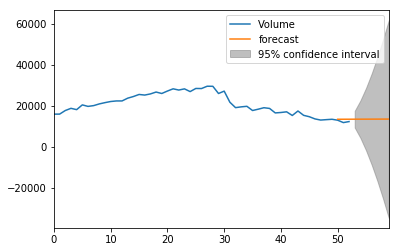

In [223]:
fig, ax = plt.subplots()
ax = data_Bulgaria['Volume'].plot()
fig = model_fit.plot_predict(start = 50, end= 59, dynamic=True, ax=ax,plot_insample=False)
plt.show()

VIsualisations


In [135]:
sum_ff_bycnt = df.groupby('Area').sum()
year_item_mean = sum_ff_bycnt.mean(axis=1)


In [136]:
ff_mean = df.groupby('Element').mean()
ff_med = df.groupby('Element').median()
ffmean_by_date = ff_mean.drop(['Area Code','Item Code','Element Code','latitude','longitude'],axis=1).T
ffmed_by_date = ff_med.drop(['Area Code','Item Code','Element Code','latitude','longitude'],axis=1).T

In [137]:
## re-index the years to date time
nidx = []
for i in ffmean_by_date.index:
    nidx.append(pd.to_datetime(i[1:]))
ffmean_by_date.index = nidx
ffmed_by_date.index = nidx

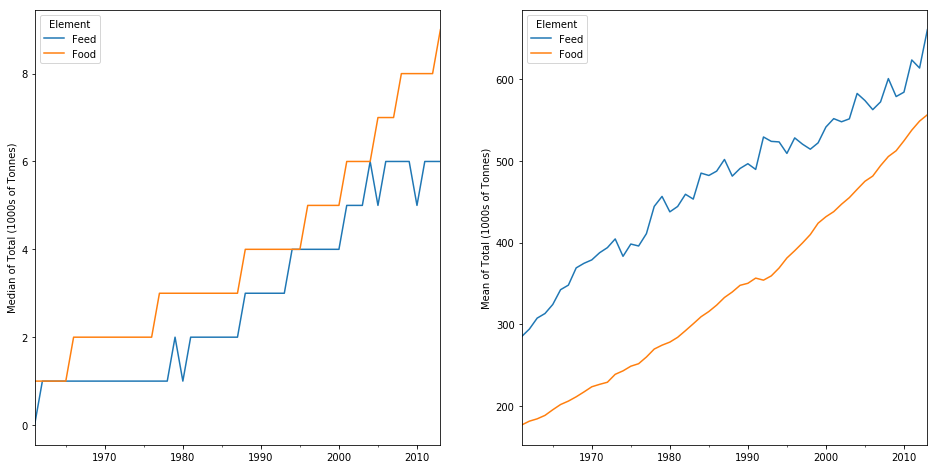

In [138]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ffmed_by_date.plot(ax=ax[0]);
ax[0].set_ylabel('Median of Total (1000s of Tonnes)');
ffmean_by_date.plot(ax=ax[1]);
ax[1].set_ylabel('Mean of Total (1000s of Tonnes)');

In [139]:
mean_lat_lon_bycnt = df.groupby('Area').mean()[['latitude','longitude']]

In [140]:
## get top 5 from index
cnt = year_item_mean.sort_values(ascending=False).index[:5].values
# print(cnt)
top5 = sum_ff_bycnt.T
top5.index = nidx
fig, ax=plt.subplots(1,1,figsize=(14,8))
for c in cnt:
    top5[c].plot(ax=ax, legend=True);
plt.title('Top 5 Countries - Sum of all Items Year Over Year');
plt.ylabel('Food+Feed : 1000s Tonnes');

ValueError: Length mismatch: Expected axis has 58 elements, new values have 53 elements

In [146]:
import os
from collections import Counter
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import geopandas as gpd
from shapely.geometry import Point

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [144]:
## pul the mean lats and longs into the sums DF
sum_ff_bycnt['lat'] = mean_lat_lon_bycnt['latitude']
sum_ff_bycnt['lon'] = mean_lat_lon_bycnt['longitude']

## using panadas geometry
geometry = [Point(xy) for xy in zip(sum_ff_bycnt.lon, sum_ff_bycnt.lat)]
crs = {'init': 'epsg:4326'}
gitems = gpd.GeoDataFrame(sum_ff_bycnt, crs=crs, geometry=geometry)

## world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
## Just a quick and dirty /100 normalization to make the plot below more feasible.
sum_ff_bycnt['Year_Mean'] = year_item_mean/100 #np.min(year_item_mean)
sum_ff_bycnt.head()

NameError: name 'Point' is not defined

NameError: name 'world' is not defined

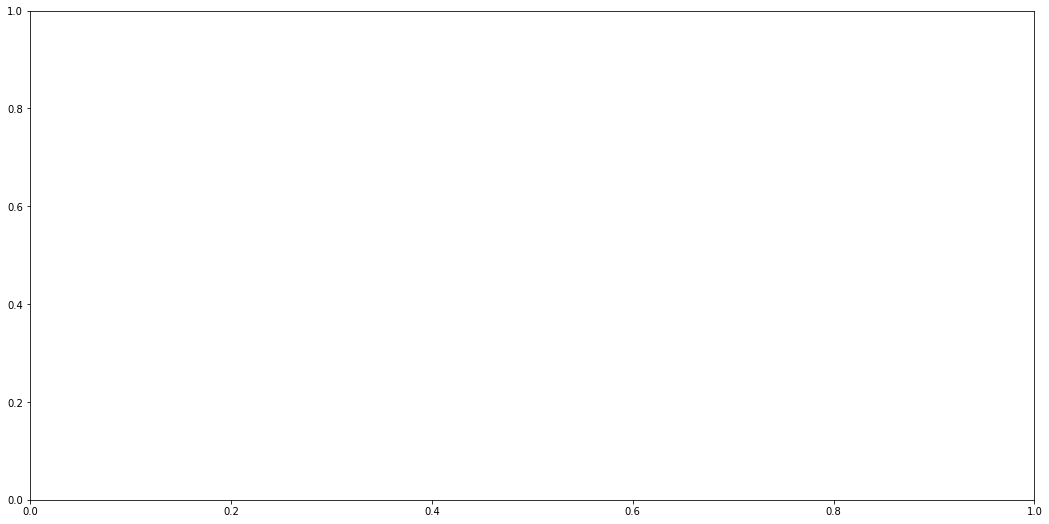

In [145]:
fig, ax=plt.subplots(1,1,figsize=(18,9))
base = world.plot(color='white', edgecolor='black',ax=ax);
#gitems.plot(ax=ax)
src = ax.scatter(sum_ff_bycnt.lon, sum_ff_bycnt.lat, marker='o', 
           s = sum_ff_bycnt.Year_Mean, c=sum_ff_bycnt.Year_Mean,
           cmap=plt.get_cmap
           ('jet'), alpha=0.4)
plt.colorbar(src);
plt.title('Year over Year Sum of Average Food+Feed  :  1000s of Tonnes / 100');

In [150]:
 data_Bulgaria
    

,Area,Year,Volume
0,Bulgaria,Y1961,15979.0
1,Bulgaria,Y1962,15990.0
2,Bulgaria,Y1963,17748.0
3,Bulgaria,Y1964,18812.0
4,Bulgaria,Y1965,18178.0
5,Bulgaria,Y1966,20501.0
6,Bulgaria,Y1967,19766.0
7,Bulgaria,Y1968,20146.0
8,Bulgaria,Y1969,20984.0
9,Bulgaria,Y1970,21607.0


In [163]:
data_Bulgaria['Year1']   = pd.to_numeric(data_Bulgaria['Year1'])

AttributeError: Unknown property axis

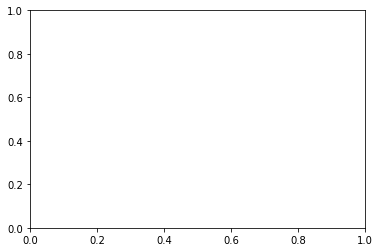

In [175]:
ax = data_Bulgaria['Volume'].plot(axis = data_Bulgaria['Year'])
#plt.axis(data_Bulgaria['Year'])
#fig = model_fit.plot_predict('2014', '2017', dynamic=True, ax=ax,plot_insample=False)
#plt.show()